##K-means to cluster similar tourist cities

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("/content/Europe_ratings.csv")
data
import plotly.express as px
fig = px.scatter_matrix(data.drop("City",axis=1),
width=1200, height=1600)
fig.show()

In [ ]:
data.head()

,City,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,Amsterdam,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,Athens,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,Barcelona,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,Basel,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,Belfast,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np
X=data.drop("City",axis=1)
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=100,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=43)
y = kmeans.fit_predict(X[:,1:24])
data['Cluster'] = y


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
df =data.groupby(['Cluster'])
df.head()

,City,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Cluster
0,Amsterdam,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.00,0.00,0.00,2
1,Athens,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.00,0.00,0.00,2
2,Barcelona,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.00,0.00,0.00,2
3,Basel,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.00,0.00,0.00,2
4,Belfast,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.00,0.00,0.00,2
71,Split,0.85,0.84,0.85,0.88,3.87,2.94,5.00,2.91,2.80,...,1.30,0.58,0.58,0.53,0.51,0.53,0.78,0.76,0.80,0
100,Aberdeen,1.38,1.55,1.91,1.91,3.23,2.28,3.22,4.53,5.00,...,0.61,0.00,0.00,0.00,0.56,0.52,1.08,1.36,1.34,0
102,Alkmaar,1.34,1.42,1.93,1.91,1.92,3.22,3.22,3.25,5.00,...,0.74,0.00,0.00,0.00,0.52,0.51,1.05,1.36,1.35,0
103,Amersfoort,1.34,1.36,1.93,1.42,1.92,1.98,3.22,4.57,5.00,...,0.72,0.51,0.00,0.00,0.00,0.51,1.04,1.36,1.35,0
104,Ancona,1.34,1.35,5.00,1.41,1.92,3.23,3.22,3.99,5.00,...,5.00,0.54,0.00,0.00,0.00,0.66,1.09,1.36,1.35,0


##Explainable AI
###IMM Clustering
Iterative Mistake Minimization (IMM) clustering is a tree-based clustering algorithm that builds a decision tree with the same number of leaves as the number of clusters considered in K-means clustering.
The following steps describe how the algorithm works on a high level:

Finding a clustering solution using some non-explainable clustering algorithm (like K-means)
Labelling each example according to its cluster
Calling a supervised algorithm that learns a decision tree


* A reference set of K centres from a standard clustering algorithm is obtained for a dataset X.

* Each data point Xj is assigned the label yj based on the centre it is closest to.

* A decision tree is then built top-down using binary splits.

* If a node contains two or more of the reference centres, then it is split again. This is done by picking a feature and a corresponding threshold value such that the resulting split sends at least one reference centre to each side and moreover produces the fewest mistakes: that is, separates the minimum points from their corresponding centres.

* The optimal split is found by scanning through all pairs efficiently by dynamic programming. This node is then added to the tree.

* The tree stops growing where each of the K centres is in
its own leaf.

ExKMC is an extension of IMM as when the number of leaves exceeds the number of clusters (from K-means), to achieve better partitioning.

The algorithm intakes a value K, a dataset X, and a number of leaves K’>K.
ExKMC starts with a set of K reference centers taken from any clustering algorithm. This is followed by building a threshold tree with K leaves (IMM algorithm).
The best feature-threshold pair to expand the tree one node at a time is computed.


Reference Code: https://github.com/navefr/ExKMC

In [ ]:
pip install ExKMC

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ExKMC: filename=ExKMC-0.0.3-cp39-cp39-linux_x86_64.whl size=403285 sha256=2dee84ff987aea0e4866c5d2339924acd7938d99eafd318c282787608598427b
  Stored in directory: /root/.cache/pip/wheels/98/b1/70/e6193be0137744643efff90fa95db9ab4dd1a4137e56d537f1
Successfully built ExKMC


In [ ]:
from ExKMC.Tree import Tree
from IPython.display import Image

In [ ]:
#As per the IMM algorithm, we build the decision tree with max leaves =3, but the error rate was high hence we moved to ExKMC
#with optimal number of 10 leaves

tree = Tree(k=3,max_leaves=10)
tree.fit(X[:,1:24], kmeans)

In [ ]:
X = pd.DataFrame(X)

In [ ]:
X.columns

RangeIndex(start=0, stop=24, step=1)

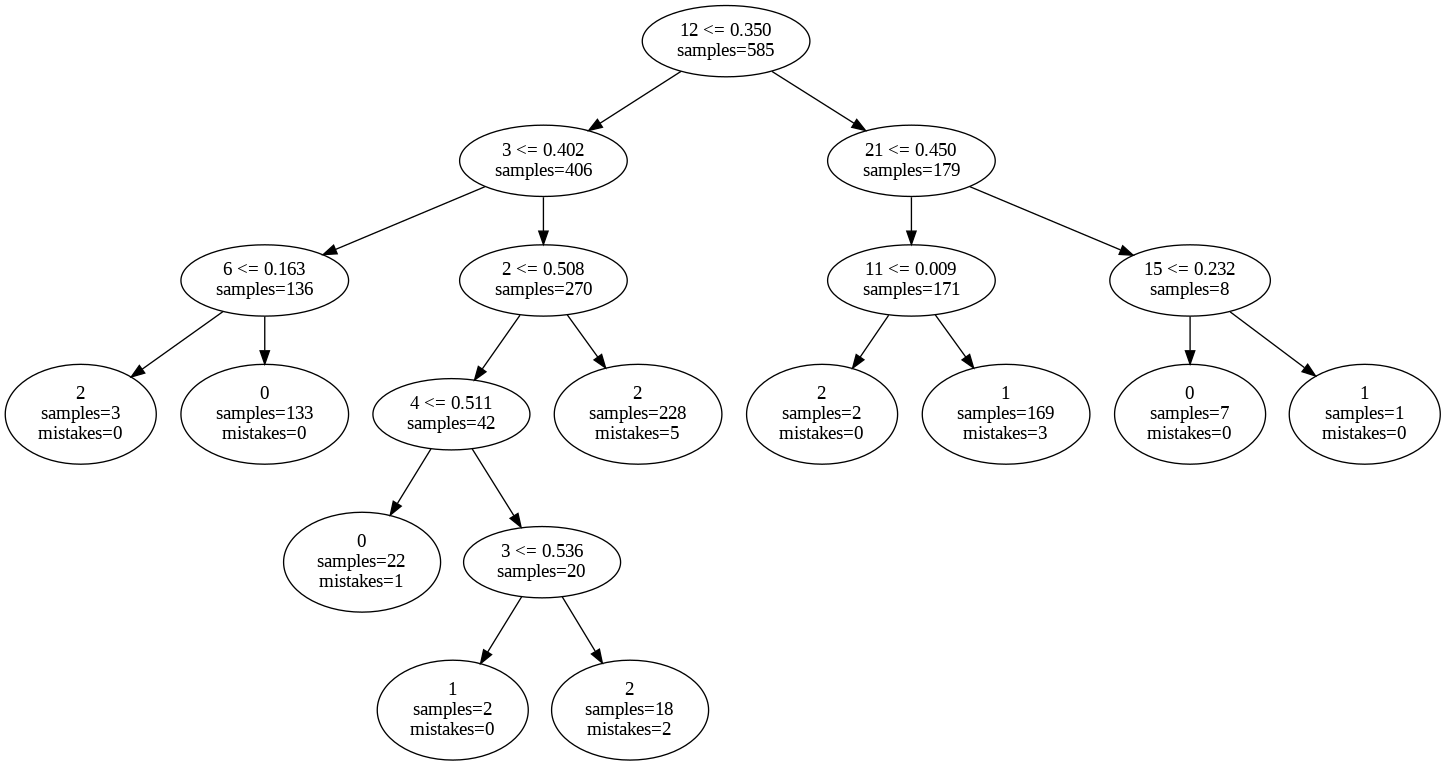

In [ ]:
import numpy as np
tree.plot(filename="test", feature_names=X.columns)
Image(filename='test.gv.png')